# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading Train Data

In [3]:
Train_Data = pd.read_csv('trainset.csv')

# Information From The Data

In [7]:
Train_Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [8]:
# Ensuring that there is not non-null values
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [9]:
# Check if there is any missing values
Train_Data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
# Checking of any duplicated values
dup_vals = Train_Data.duplicated()

In [12]:
dup_vals

0       False
1       False
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257    False
1258    False
Length: 1259, dtype: bool

In [13]:
# Print the starting Date and end date of the data
Start_Date = Train_Data.iloc[0][0]
End_Date = Train_Data.iloc[-1][0]

print(f"Staring date : {Start_Date}")
print(f"Ending date : {End_Date}")

Staring date : 2013-01-02
Ending date : 2017-12-29


# Feature Scaling

In [14]:
# Select all rows and the first two columns values
Loc_Vals = Train_Data.iloc[:,1:2].values
Loc_Vals

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [16]:
# import MinMaxScaler from scikit-learn
from sklearn.preprocessing import MinMaxScaler
Scalar = MinMaxScaler(feature_range = (0,1))
training_scaled_Data = Scalar.fit_transform(Loc_Vals)
training_scaled_Data

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [19]:
x_train = []
y_train = []

for i in range(60,1259):
    x_train.append(training_scaled_Data[i-60:i, 0])                    
    y_train.append(training_scaled_Data[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
x_train.shape

(1199, 60)

In [20]:
# Reshaping x_train array to have a specific shape required input to be fed to RNN model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))         

# Importing Necessary Libraries For RNN

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Analysing With LSTM

In [22]:
# Using Sequntial model from keras and adding an LSTM layer to it
# The first LSTM layer
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

In [23]:
# We used Dropout to prevent overfitting
regressor.add(Dropout(0.2))

In [24]:
# Adding the second LSTM layer
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [25]:
# Adding the third LSTM layer
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [26]:
# Adding the fourth LSTM layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [27]:
# Adding Dense layer to the existing sequntial model with 1 unit
regressor.add(Dense(units = 1))

In [28]:
# Compiling the model with approptiate loss function and optimizer
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [53]:
# Fitting the model to training data
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0017
Epoch 2/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0016
Epoch 3/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0017
Epoch 4/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0015
Epoch 5/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0018
Epoch 6/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0020
Epoch 7/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0016
Epoch 8/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0015
Epoch 9/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0016
Epoch 10/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0015
Epoch 11/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0015
Epoch 12/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0016
Epoch 13/100
38/38

# Reading Test Data

In [30]:
Test_Data = pd.read_csv('testset.csv')

# Information From The Data

In [31]:
Test_Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600
...,...,...,...,...,...,...,...
120,2018-06-25,1143.599976,1143.910034,1112.780029,1124.810059,1124.810059,2157300
121,2018-06-26,1128.000000,1133.209961,1116.659058,1118.459961,1118.459961,1563200
122,2018-06-27,1121.339966,1131.836060,1103.619995,1103.979980,1103.979980,1293900
123,2018-06-28,1102.089966,1122.310059,1096.010010,1114.219971,1114.219971,1072400


In [32]:
# Ensuring that there is not non-null values
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       125 non-null    object 
 1   Open       125 non-null    float64
 2   High       125 non-null    float64
 3   Low        125 non-null    float64
 4   Close      125 non-null    float64
 5   Adj Close  125 non-null    float64
 6   Volume     125 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.0+ KB


# Analysing Test Data

In [33]:
Stock_Price = Test_Data.iloc[:,1:2].values

In [34]:
# Concatenate the 'open' column in Train_Data and Test_Data along axis = 0 to accurately make prediction and provide high accuracy
Concat_Data = pd.concat((Train_Data['Open'],Test_Data['Open']), axis = 0)
Concat_Data

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [41]:
# Extracting subset of raws from Concat_Data to Apply Training and Testing_Split
inputs = Concat_Data[len(Concat_Data) - len(Test_Data)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [54]:
inputs.shape

(185, 1)

In [43]:
# Transforming data in two dimensional Array with one column
inputs = inputs.reshape(-1,1)
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [44]:
# Transforming MinMaxScalar
inputs = Scalar.transform(inputs)
inputs.shape

(185, 1)

In [45]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [46]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [47]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [48]:
predicted_price = regressor.predict(x_test)

4/4 [==============================] - 1s 20ms/step


In [49]:
predicted_price

array([[1.0029402 ],
       [1.0002092 ],
       [0.9975532 ],
       [0.99668217],
       [0.99859464],
       [1.0035353 ],
       [1.0111212 ],
       [1.019893  ],
       [1.0287656 ],
       [1.0367507 ],
       [1.0443642 ],
       [1.0516806 ],
       [1.0587145 ],
       [1.0652999 ],
       [1.0714031 ],
       [1.0777442 ],
       [1.0852246 ],
       [1.0937424 ],
       [1.1027555 ],
       [1.111575  ],
       [1.1192431 ],
       [1.1252893 ],
       [1.129336  ],
       [1.1299587 ],
       [1.1257552 ],
       [1.1147076 ],
       [1.099085  ],
       [1.0809661 ],
       [1.0611737 ],
       [1.0419377 ],
       [1.0250776 ],
       [1.0118629 ],
       [1.0038369 ],
       [1.0016631 ],
       [1.0047623 ],
       [1.0122137 ],
       [1.0228137 ],
       [1.0348196 ],
       [1.0471194 ],
       [1.0592204 ],
       [1.0698779 ],
       [1.0776503 ],
       [1.0799592 ],
       [1.0769455 ],
       [1.0708553 ],
       [1.0635574 ],
       [1.0574307 ],
       [1.054

In [50]:
# Reverse the scaling operation, Transforming it back to its original scale
predicted_price = Scalar.inverse_transform(predicted_price)
predicted_price

array([[1077.332 ],
       [1075.3517],
       [1073.4257],
       [1072.7941],
       [1074.1809],
       [1077.7635],
       [1083.2644],
       [1089.6254],
       [1096.0592],
       [1101.8496],
       [1107.3706],
       [1112.676 ],
       [1117.7766],
       [1122.552 ],
       [1126.9778],
       [1131.5759],
       [1137.0004],
       [1143.177 ],
       [1149.7129],
       [1156.1083],
       [1161.6687],
       [1166.0531],
       [1168.9875],
       [1169.4391],
       [1166.391 ],
       [1158.3798],
       [1147.0511],
       [1133.9124],
       [1119.5598],
       [1105.611 ],
       [1093.3849],
       [1083.8024],
       [1077.9823],
       [1076.406 ],
       [1078.6533],
       [1084.0568],
       [1091.7433],
       [1100.4493],
       [1109.3684],
       [1118.1434],
       [1125.8717],
       [1131.5078],
       [1133.1821],
       [1130.9968],
       [1126.5804],
       [1121.2885],
       [1116.8457],
       [1114.7955],
       [1116.3811],
       [1121.7322],


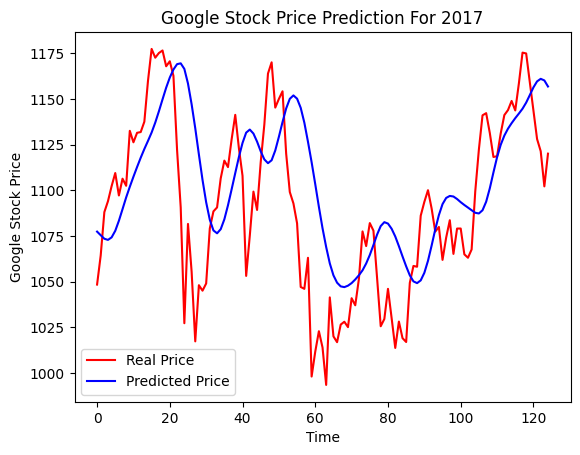

In [52]:
plt.plot(Stock_Price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction For 2017')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()